# Actividad 4 — Telco Customer Churn (Módulo 1)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", rc={"axes.titlesize":14, "axes.labelsize":12})
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

## Carga del dataset


In [4]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Module1-python/Telco/Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)
print("Shape:", df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


 ## Limpieza de datos

In [5]:
df.info()

# Convertir TotalCharges a numérico
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Nulos
print("Nulos antes:", df["TotalCharges"].isna().sum())
df = df.dropna(subset=["TotalCharges"])
print("Nulos después:", df["TotalCharges"].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Estadísticas descriptivas
desc = df[["tenure", "MonthlyCharges", "TotalCharges"]].describe().T
desc

,count,mean,std,min,25%,50%,75%,max
tenure,"7,032.00",32.42,24.55,1.00,9.00,29.00,55.00,72.00
MonthlyCharges,"7,032.00",64.80,30.09,18.25,35.59,70.35,89.86,118.75
TotalCharges,"7,032.00","2,283.30","2,266.77",18.80,401.45,"1,397.47","3,794.74","8,684.80"


## Análisis de estadísticas descriptivas

- **Tenure**: los clientes tienen en promedio **32 meses** de permanencia, pero la mediana es **29 meses**, lo que indica una ligera asimetría a la derecha (hay clientes con contratos mucho más largos que elevan el promedio).  

- **MonthlyCharges**: el cargo mensual promedio es de $64.8 USD

Con una mediana de $70.35, mostrando que la mayoría de los clientes paga más cerca de los valores altos.  

- **TotalCharges**: existe una gran variabilidad, con promedio **$2283 USD**

Con una mediana $1397 USD.

Un máximo de $8685 USD, lo cual refleja la combinación de clientes recientes y de muy larga duración.  

El **cliente típico** es alguien con un tenure menor a 3 años, que paga alrededor de **$70 mensuales**, y cuyo gasto acumulado varía mucho según su tiempo en la compañía.  


In [7]:
print("Mean Tenure:", df["tenure"].mean())
print("Median Tenure:", df["tenure"].median())

Mean Tenure: 32.421786120591584
Median Tenure: 29.0


## Distribuciones

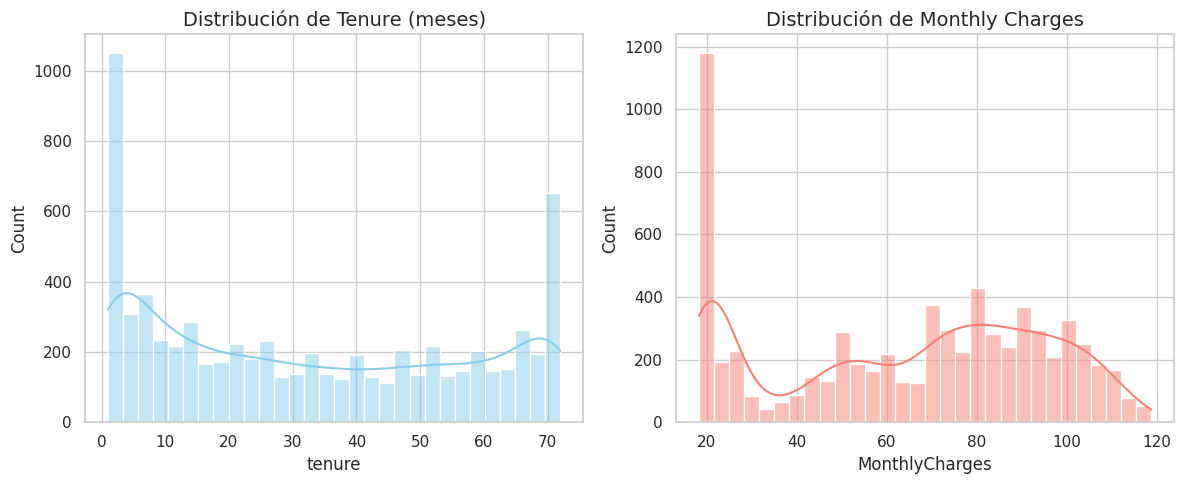

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df["tenure"], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Distribución de Tenure (meses)")

sns.histplot(df["MonthlyCharges"], bins=30, kde=True, ax=axes[1], color="salmon")
axes[1].set_title("Distribución de Monthly Charges")

plt.tight_layout()
plt.show()

- **Tenure (meses)**: La distribución muestra un gran número de clientes con muy poca permanencia (0–5 meses) y otro pico en 72 meses (6 años), lo que sugiere cancelaciones tempranas o contratos que llegan a un máximo definido.  

- **MonthlyCharges**: Los cargos mensuales presentan una distribución sesgada a la derecha, con muchos clientes pagando los mínimos ($20–25)

y otra concentración importante entre 70 y 100. Esto indica diferentes segmentos de servicio básicos y avanzados.  

Los datos reflejan la coexistencia de **clientes nuevos o de corta duración** y **clientes consolidados con servicios premium**, lo que puede influir en el análisis de churn.  


## Segmentación por Churn

In [9]:
# Mediana de tenure y MonthlyCharges por grupo de Churn
df.groupby("Churn")[["tenure", "MonthlyCharges"]].median()

,tenure,MonthlyCharges
Churn,,
No,38.00,64.45
Yes,10.00,79.65


/tmp/ipython-input-1017339555.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette="Set2")


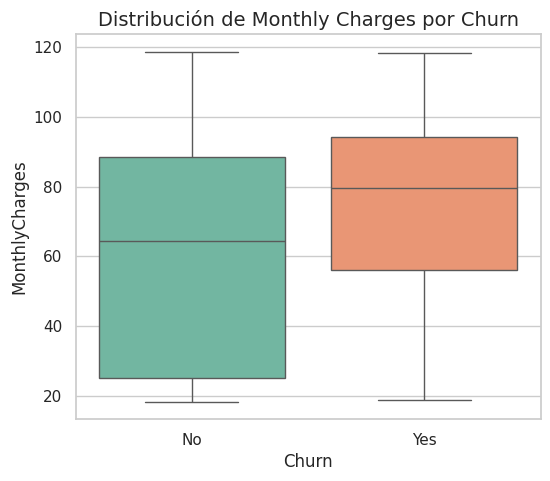

In [10]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette="Set2")
plt.title("Distribución de Monthly Charges por Churn")
plt.show()

Al comparar los cargos mensuales entre clientes que **churnearon (Yes)** y los que **no (No)**:

- Los clientes que se dieron de baja tienden a tener **MonthlyCharges más altos** (mediana ≈ $80).  

- Los clientes que permanecen tienen una mediana menor (≈ $64).

- La dispersión en el grupo de churn es también más amplia, mostrando que los clientes que pagan más suelen abandonar con mayor frecuencia.

El churn se concentra en clientes con **planes de mayor costo**, lo que sugiere que el precio podría ser un factor clave en la decisión de abandonar.  


## Conclusiones

- Los clientes típicos tienen menos de 3 años de permanencia y pagan alrededor de $70 USD al mes.  
- Existen dos segmentos claros: clientes nuevos con baja permanencia y clientes consolidados con contratos largos.  
- El churn se concentra en usuarios con cargos mensuales más altos, lo que indica que el precio es un factor clave en la decisión de abandono.  
- Identificar estrategias de retención enfocadas en clientes con planes de mayor costo puede ayudar a reducir la tasa de churn.